In [8]:
import itertools

for i in itertools.combinations(range(1,5),2):
    print(i)
print("-----------------------------------------------------------------")    
for i in itertools.combinations(range(1,5),3):
    print(i)

(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)
-----------------------------------------------------------------
(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)


( [0, 1, 2, 3, 4] ) ( [5, 6, 7, 8, 9, 10] )


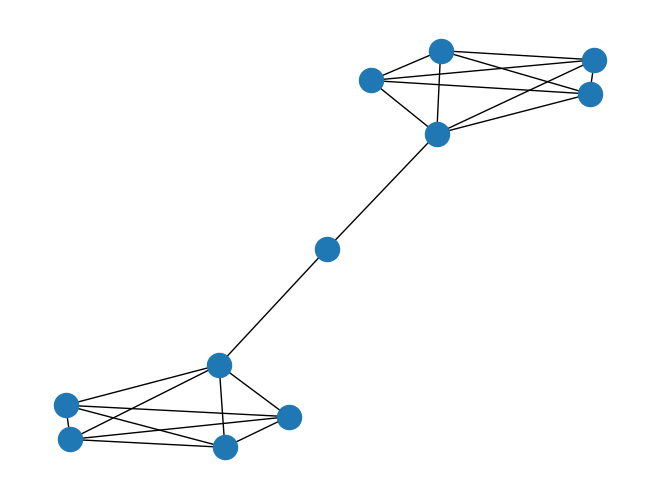

In [13]:
import networkx as nx
import itertools 

def communities_brute(G):
    nodes = G.nodes()  # list of nodes
    n = G.number_of_nodes()
 
    first_community = []
    for i in range(1, n // 2 + 1):  # Use integer division
        comb = [list(x) for x in itertools.combinations(nodes, i)]
        first_community.extend(comb)

    second_community = []
    for i in range(len(first_community)):
        l = list(set(nodes) - set(first_community[i]))
        second_community.append(l)

    # Which community is the best community?
    num_intra_edges1 = []
    num_intra_edges2 = []
    num_inter_edges = []
    ratio = []  # Ratio of number of intra/number of inter community edges

    for i in range(len(first_community)):
        num_intra_edges1.append(G.subgraph(first_community[i]).number_of_edges())

    for i in range(len(second_community)):
        num_intra_edges2.append(G.subgraph(second_community[i]).number_of_edges())

    e = G.number_of_edges()

    for i in range(len(first_community)):
        num_inter_edges.append(e - num_intra_edges1[i] - num_intra_edges2[i])

    # Find the ratio
    for i in range(len(first_community)):
        if num_inter_edges[i] > 0:
            ratio.append((float(num_intra_edges1[i] + num_intra_edges2[i])) / num_inter_edges[i])
        else:
            ratio.append(0)  # To avoid division by zero
    
    max_value = max(ratio)
    max_index = ratio.index(max_value)

    print('(', first_community[max_index], ')', '(', second_community[max_index], ')')

    nx.draw(G)

    import matplotlib.pyplot as plt

    plt.show()

G = nx.barbell_graph(5, 1)
communities_brute(G)


Best partition: Community 1: [0, 1, 2, 3, 4], Community 2: [5, 6, 7, 8, 9, 10]


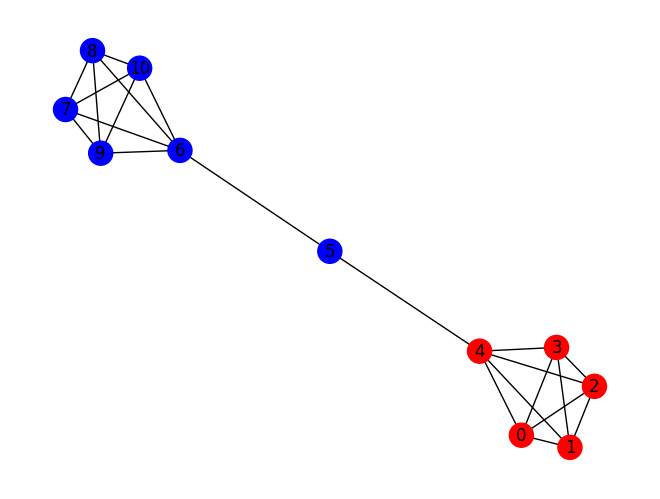

In [9]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

def communities_brute(G):
    nodes = list(G.nodes())  # Get the list of nodes
    n = G.number_of_nodes()
 
    first_community = []
    for i in range(1, n // 2 + 1):  # Use integer division
        comb = [list(x) for x in itertools.combinations(nodes, i)]
        first_community.extend(comb)

    second_community = []
    for community in first_community:
        l = list(set(nodes) - set(community))
        second_community.append(l)

    # Find community edge ratios
    e = G.number_of_edges()
    best_ratio, best_partition = 0, None

    for i, (comm1, comm2) in enumerate(zip(first_community, second_community)):
        intra_edges1 = G.subgraph(comm1).number_of_edges()
        intra_edges2 = G.subgraph(comm2).number_of_edges()
        inter_edges = e - intra_edges1 - intra_edges2

        if inter_edges > 0:
            ratio = (intra_edges1 + intra_edges2) / inter_edges
        else:
            ratio = 0  # Avoid division by zero

        if ratio > best_ratio:
            best_ratio, best_partition = ratio, (comm1, comm2)

    # Output and visualization
    if best_partition:
        comm1, comm2 = best_partition
        print(f'Best partition: Community 1: {comm1}, Community 2: {comm2}')
        
        # Draw graph with different colors for the two communities
        color_map = ['red' if node in comm1 else 'blue' for node in G.nodes()]
        nx.draw(G, node_color=color_map, with_labels=True)
        plt.show()

G = nx.barbell_graph(5, 1)
communities_brute(G)


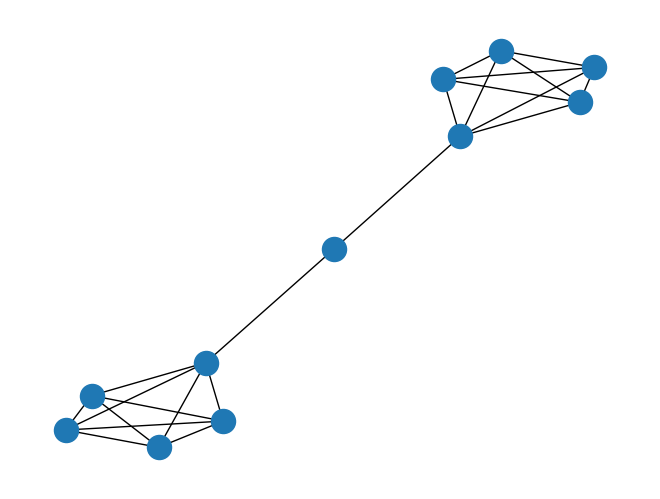

In [14]:
G = nx.barbell_graph(5,1)

nx.draw(G)

import matplotlib.pyplot as plt

plt.show()

In [21]:
import networkx as nx

def edge_to_remove(G):
    dict1 = nx.edge_betweenness_centrality(G)
    list_of_tuples = list(dict1.items())
    list_of_tuples.sort(key=lambda x: x[1], reverse=True)
    return list_of_tuples[0][0]

def girvan(G):
    c = [G.subgraph(component).copy() for component in nx.connected_components(G)]
    l = len(c)
    print('The number of connected components are', l)

    G.remove_edge(*edge_to_remove(G))  # (a, b) --> (a,b)

    while l == 1:
        c = [G.subgraph(component).copy() for component in nx.connected_components(G)]
        l = len(c)
        print('The number of connected components are', l)

    return c

G = nx.barbell_graph(5, 0)
c = girvan(G)

for i in c:
    print(i.nodes())
    print("................................................................")


The number of connected components are 1
The number of connected components are 2
[0, 1, 2, 3, 4]
................................................................
[5, 6, 7, 8, 9]
................................................................


In [22]:
G = nx.karate_club_graph()
c = girvan(G)

for i in c:
    print(i.nodes())
    print("................................................................")



The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of connected components are 1
The number of co

KeyboardInterrupt: 